In [1]:
#imports
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np

In [2]:
plots.ClockPlot?

In [3]:
#For context for the rest of the notebook, the code in this cell would create these parquet
#files that we are loading in throughout the rest of this notebook if there were still csvs
#in data/winter, data/fall, and data/fall_2015. But they are not there because they take
#a lot of space
directory = {
    'fall':'data/fall',
    'winter':'data/winter',
    'fall_2015':'data/fall_2015'
}
timezone = "America/Los_Angeles"
latitude = 47.61
longitude = 122.33

Lets mock create the parquet found in the following cell: data/winter_2018timing.parquet

For reference: https://tktran11.github.io/SALA/processing.html


    sala_example = processing.SALAFrame(latitude, longitude, timezone, directory = directory)
    winter_raw_data = sala_example.get_raw_data_from_key('winter')
    sala_example.process_data(winter_raw_data, [[5],[50],[500]])
    sala_example.data = sala_example.sun_timings()
    short_frame, timing_data = sala_example.process_sleep(winter_raw_data, num_sleeps = 1)


Now sala_example.data should have everything needed to run clockplots on it.
We would call a clockplot function on sala_example like:

    plots.ClockPlot.plot(sala_example.data, 'Group', thresholds = [5,50,500], timezone = 'Europe/London')

In [4]:
sala_winter_data = pd.read_parquet('data/winter_2018timing.parquet')
sala_winter_parquet = processing.SALAFrame(latitude, longitude, timezone, data = sala_winter_data)
sala_winter_data

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,winter0112,2018-02-21,5,2018-02-22 01:51:15,1311.0,2018-02-21 11:10:00,430.0,0 days 02:19:00,0 days 00:26:00,139.00,...,winterWed,winterWeekday,False,2018-02-21 07:02:26.797121+00:00,2018-02-21 17:25:35.733208+00:00,2018-02-22 02:25:15,2018-02-22 10:29:30,0 days 08:04:15,1585.25,629.50
1,winter0112,2018-02-18,5,2018-02-19 03:03:15,1383.0,2018-02-18 08:25:15,265.0,0 days 02:27:45,0 days 00:05:00,147.75,...,winterSun,winterWeekend/Holiday,True,2018-02-18 07:08:27.957127+00:00,2018-02-18 17:20:10.462755+00:00,2018-02-19 04:46:00,2018-02-19 14:08:15,0 days 09:22:15,1726.00,848.25
2,winter0112,2018-02-08,5,2018-02-09 00:35:45,1235.0,2018-02-08 13:14:15,554.0,0 days 01:51:00,0 days 00:00:00,111.00,...,winterThu,winterWeekday,False,2018-02-08 07:27:09.085726+00:00,2018-02-08 17:01:55.037768+00:00,2018-02-09 03:55:45,2018-02-09 09:59:45,0 days 06:04:00,1675.75,599.75
3,winter0112,2018-02-17,5,2018-02-18 03:59:00,1439.0,2018-02-17 12:47:00,527.0,0 days 04:14:15,0 days 00:00:00,254.25,...,winterSat,winterWeekend/Holiday,True,2018-02-17 07:10:26.066947+00:00,2018-02-17 17:18:21.583381+00:00,2018-02-18 09:35:00,2018-02-18 14:11:00,0 days 04:36:00,2015.00,851.00
4,winter0112,2018-02-22,5,2018-02-22 12:41:45,521.0,2018-02-22 10:56:00,416.0,0 days 00:22:15,0 days 00:10:45,22.25,...,winterThu,winterWeekday,False,2018-02-22 07:00:24.275421+00:00,2018-02-22 17:27:23.660636+00:00,2018-02-22 00:00:00,2018-02-22 00:00:00,0 days 00:00:00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,winter0041,2018-01-26,500,2018-01-26 21:23:30,1043.0,2018-01-26 13:16:30,556.0,0 days 01:34:00,0 days 00:00:00,94.00,...,winterFri,winterWeekday,False,2018-01-26 07:47:13.680113+00:00,2018-01-26 16:38:24.851538+00:00,2018-01-27 01:20:15,2018-01-27 15:04:15,0 days 13:44:00,1520.25,904.25
1387,winter0041,2018-02-07,500,2018-02-07 13:04:00,544.0,2018-02-07 11:21:15,441.0,0 days 00:01:30,0 days 00:01:00,1.50,...,winterWed,winterWeekday,False,2018-02-07 07:28:53.005250+00:00,2018-02-07 17:00:05.157857+00:00,2018-02-07 00:00:00,2018-02-07 00:00:00,0 days 00:00:00,0.00,0.00
1388,winter0041,2018-01-30,500,2018-01-31 02:36:15,1356.0,2018-01-30 12:52:00,532.0,0 days 00:16:45,0 days 00:00:00,16.75,...,winterTues,winterWeekday,False,2018-01-30 07:41:39.353070+00:00,2018-01-30 16:45:32.140252+00:00,2018-01-31 03:09:45,2018-01-31 11:37:00,0 days 08:27:15,1629.75,697.00


These clockplots I am replicating were made originally using old SALA software in this github link: https://github.com/jasongfleischer/SALA/blob/master/Make%20clock%20plots.ipynb

Non-grouped clock plot aka no group_by for winter_2018 dataset.

For reference: group_by means one graph is plotted with the variable being True and one graph plotted with variable False

Non-grouped clock plot aka no group_by for the winter 2018 dataset.

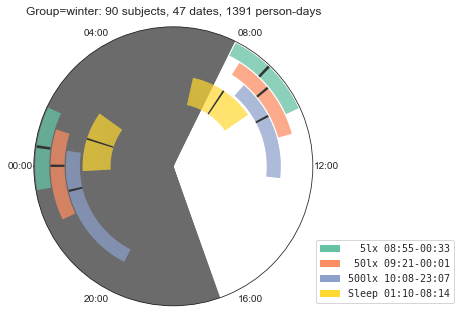

In [5]:
plots.ClockPlot.plot(sala_winter_parquet.data, 'Group', thresholds = [5,50,500], timezone = 'Europe/London')

Plot grouped by OutOfSchool for winter2018 dataset

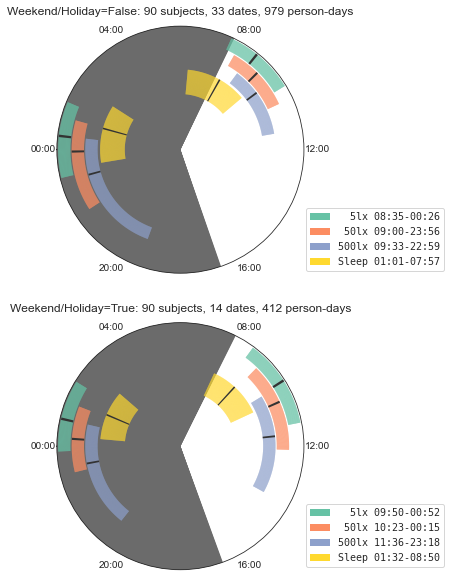

In [6]:
plots.ClockPlot.plot(sala_winter_parquet.data, 'Weekend/Holiday' ,thresholds=[5,50,500], timezone = 'Europe/London')

In [7]:
data = pd.read_parquet('data/fall_2015timing.parquet')
sala = processing.SALAFrame(latitude, longitude, timezone, data = data)

Non-grouped clock plot aka no group_by for one participant in the Fall_2015 dataset.

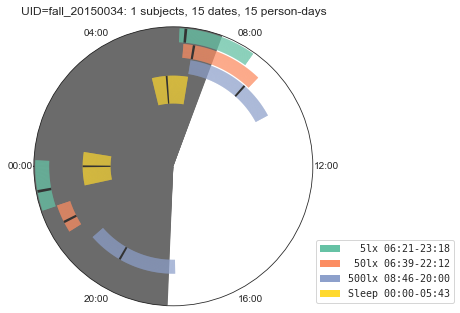

In [8]:
#how to run the non-grouped clock plot aka no group_by(group_by means one graph is plotted with the variable being true and one graph plotted with variable false)
plots.ClockPlot.plot(sala.data, 'UID', thresholds = [5,50,500], timezone = 'Europe/London')

Plot grouped by OutOfSchool for one participant in the Fall_2015 dataset.

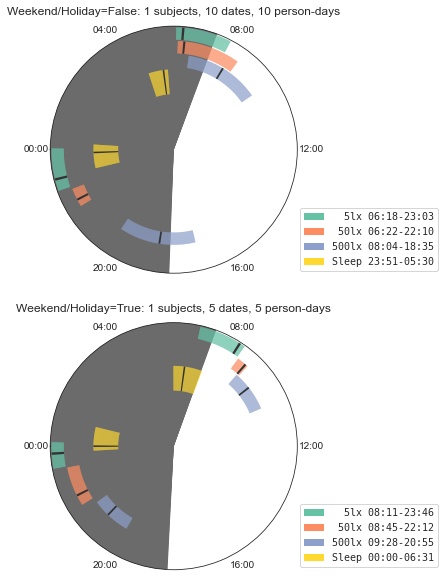

In [9]:
#individuals clock plot, group_by = OutOfSchool
plots.ClockPlot.plot(sala.data, 'Weekend/Holiday' ,thresholds=[5,50,500], timezone = 'Europe/London')

In [10]:
"""
    @param sala: the object that is outputted from the previous function. This sala object has .data component that is the result of the process data function, the one that summarizes
    @param num_sleeps: number of times sleep in a day needed for process_sleep function.
    From processed data on the sala object, do sun_timings() and process_sleep() to get sunrise, sunset and sleep onset and sleep offset times. Returns a timing_data dataframe that has all the data needed to plot clockplot
"""
def create_complete_timing_data(sala, num_sleeps):
    sala.data = sala.sun_timings()
    short_frame, timing_data = sala.process_sleep(raw_data, num_sleeps = num_sleeps)
